# Математическая статистика
## Практическое задание 1

В данном задании рассматриваются различные способы генерации выборки из некоторых стандартных распределений, а так же рассматриваются некоторые свойства эмпирической функции распределения и ядерной оценки плотности.

**Правила:**

* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25%, то все задание оценивается в 0 баллов.
* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 1"`. Квадратные скобки обязательны.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `1.N.ipynb` и `1.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 - 13 баллов
* Задача 2 - 3 балла
* Задача 3 - 5 баллов
* Задача 4 - 3 балла
* Задача 5 - 2 балла
* Задача 6 - 1 балл
* Задача 7 - 3 балла

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

**Задача 1.** Имеется симметричная монета. С ее помощью напишите функцию генерации выборки из многомерного нормального распределения с заданными параметрами.

*Часть 1.* Напишите сначала функцию генерации равномерного распределения на отрезке $[0, 1]$ с заданной точностью. Это можно сделать, записав случайную величину $\xi \sim U[0, 1]$ в двоичной системе системе счисления $\xi = 0,\xi_1\xi_2\xi_3...$. Тогда $\xi_i \sim Bern(1/2)$ и независимы в совокупности. Приближение заключается в том, что вместо генерации бесконечного количества $\xi_i$ мы полагаем $\xi = 0,\xi_1\xi_2\xi_3...\xi_n$.

Для получения максимального балла реализовать функцию нужно так, чтобы она могла принимать на вход в качестве параметра `size` объект `tuple` любой размерности, и возвращать объект `numpy.array` соответствующей размерности. Например, если `size=(10, 1, 5)`, то функция должна вернуть объект размера $10 \times 1 \times 5$. Кроме того, функцию `coin` можно вызвать только один раз, и, конечно же, не использовать какие-либо циклы.

In [2]:
coin = sps.bernoulli(0.5).rvs  # симметричная монета
# coin(size=10) --- реализация 10 бросков монеты

def uniform(size=1, precision=30):
    if type(size) == int: # type checking
        return coin((size, precision)) @ np.geomspace(0.5, 0.5 ** precision, precision)
    else:
        return coin(tuple(list(size) + [precision])) @ np.geomspace(0.5, 0.5 ** precision, precision)

Для $U[0, 1]$ сгенерируйте выборку и постройте график плотности.

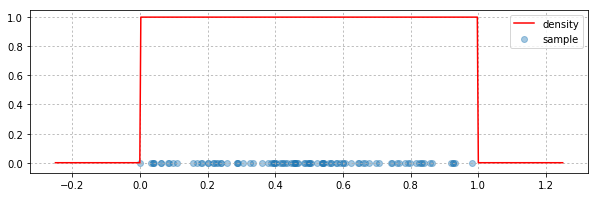

In [3]:
size = 100
grid = np.linspace(-0.25, 1.25, 500)

plt.figure(figsize=(10, 3))
plt.scatter(uniform(size,50),
           np.zeros(size), alpha=0.4, label='sample')
plt.plot(grid,
         sps.uniform.pdf(grid),
         color='red', label='density')
plt.legend()
plt.grid(ls=':')
plt.show()

Исследуйте, как меняется выборка в зависимости от precision.

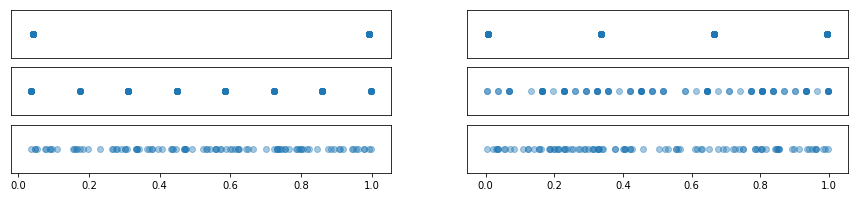

In [4]:
size = 100

plt.figure(figsize=(15, 3))
for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
    plt.subplot(3, 2, i + 1)
    plt.scatter(uniform(size, precision),
                np.zeros(size), alpha=0.4)
    plt.yticks([])
    if i < 4: plt.xticks([])
plt.show()

**Вывод:** При увеличении точности изображение выборки начинает более походить на непрерывное равномерное распределение, естественно при соответствующем размере этой выборки. Это было ожидаемо, ведь чтобы описать все числа отрезка [0,1] необходимо бесконечное число знаков после запятой в двоичной записи этого числа, а точность и определяет данное число.

*Часть 2.* Напишите функцию генерации выборки размера `size` (как и раньше, тут может быть `tuple`) из распределения $\mathcal{N}(loc, scale^2)$ с помощью преобразования Бокса-Мюллера (задача 7.12 из книги по теории вероятностей).

Для получения полного балла реализация должна быть без циклов.

In [5]:
def normal(size=1, loc=0, scale=1, precision=30):
    return loc + scale * np.cos(2 * np.pi * uniform(size, precision))*np.sqrt(-2 * np.log(uniform(size, precision) + 1e-50))

Для $\mathcal{N}(0, 1)$ сгенерируйте выборку и постройте график плотности этого распределения на отрезке $[-3, 3]$.

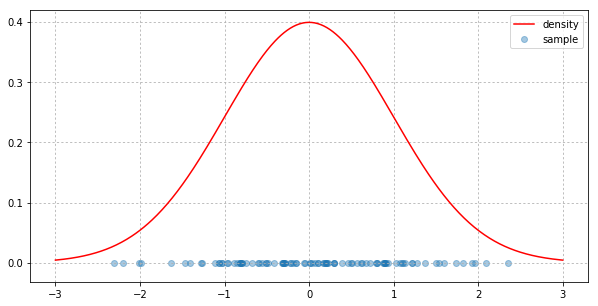

In [6]:
size = 100
grid = np.linspace(-3, 3, 500)

plt.figure(figsize=(10, 5))
plt.scatter(normal(size, 0, 1, 50),
           np.zeros(size), alpha=0.4, label='sample')
plt.plot(grid,
         sps.norm.pdf(grid),
         color='red', label='density')
plt.legend()
plt.grid(ls=':')
plt.show()

Пусть $P$ --- некоторое распределение на $(\mathbb{R}, \mathscr{B}(\mathbb{R}))$. Числа $a$ и $\sigma$ называются параметрами сдвига и масштаба соответственно для семейства распределений $\left\{P_{a,\sigma}\ \left|\ a \in \mathbb{R}, \sigma \in \mathbb{R}_+\right.\right\}$, где $P_{a,\sigma}(B) = P\left(\frac{B-a}{\sigma}\right)$ и $\frac{B-a}{\sigma} = \left\{\left. \frac{x-a}{\sigma}\ \right|\ x \in B \right\}$

**Вопрос:** Найдите плотность $P_{a,\sigma}$, если $P$ имеет плотность $p(x)$.

$Ответ: \\
F_{a,\sigma}(x) = P_{a,\sigma}([-\infty,x]) = P([-\infty,\frac{x-a}{\sigma}]) = F(\frac{x-a}{\sigma}) \\
Продифференцируем \\
p_{a,\sigma} = \frac{1}{\sigma}p(\frac{x-a}{\sigma})$

**Вопрос:** Пусть $P$ --- стандартное нормальное распределение. Выпишите параметрическое семейство распределений, параметризованное параметрами сдвига и масштаба по отношению к распределению $P$. Какая связь между параметрами и характеристиками распределения (например, математическое ожидание)?

$Ответ:\\
P_{a,\sigma} = \mathcal{N}(a,\sigma^2) \\
\xi \sim \mathcal{N}(0,1), \eta \sim \mathcal{N}(a,\sigma^2) \\
\mathbb{E}\eta = \mathbb{E}\xi + a = a \\
\mathbb{D}\eta = \mathbb{D}\xi \sigma^2 = \sigma^2
$

Постройте на одном графике разными цветами плотности стандартного нормального распределения, а так же для параметров $a=3, \sigma=1$ и $a=0, \sigma=2$. Интеравл по оси икс $[-7, 7]$.

Ниже графика теми же цветами изобразите также точку $a$ и $3\sigma$-интервал, используя шаблон, приведенный ниже.

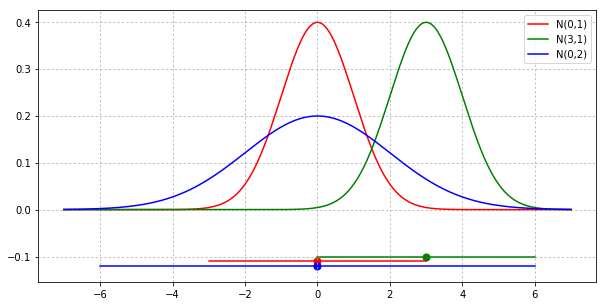

In [7]:
grid = np.linspace(-7, 7, 500)
plt.figure(figsize=(10, 5))
#N(0,1)
plt.plot(grid,
         sps.norm.pdf(grid),
         color='red', label='N(0,1)')
plt.plot([-3, 3], [-0.11, -0.11], color='red')
plt.scatter(0, -0.11, color='red', s=50)
#N(3,1)
plt.plot(grid,
         sps.norm.pdf(grid, loc = 3, scale = 1),
         color='green', label='N(3,1)')
plt.plot([0, 6], [-0.1, -0.1], color='green')
plt.scatter(3, -0.1, color='green', s=50)
#N(0,2)
plt.plot(grid,
         sps.norm.pdf(grid, loc = 0, scale = 2),
         color='blue', label='N(0,2)')
plt.plot([-6, 6], [-0.12, -0.12], color='blue')
plt.scatter(0, -0.12, color='blue', s=50)
plt.legend()
plt.grid(ls=':')
plt.show()

**Вывод:** По рисунку можно сделать вывод, что $P([a-3\sigma,a+3\sigma]) \approx 1$

*Часть 3.* Теперь напишите функцию генерации выборки из многомерного нормального распределения с заданным вектором средних `mean` и матрицей ковариаций `cov_matrix`. Помочь в этом может теорема об эквивалентных определениях гауссовского вектора. Для извлечения квадратного корня из матрицы может пригодится следующая функция, которая вычисляет собственные значения и векторы матрицы.

In [8]:
from scipy.linalg import eigh

На этот раз достаточно, чтобы функция корректно работала в случае, когда `size` является числом.

In [9]:
def gauss(mean, cov_matrix, size=1, precision=30):
    # Преобразование типов
    mean = np.array(mean)
    cov_matrix = np.array(cov_matrix)
    
    # Проверка на корректность входа
    assert mean.ndim == 1 and cov_matrix.ndim == 2
    assert mean.shape[0] == cov_matrix.shape[0]
    assert cov_matrix.shape[0] == cov_matrix.shape[1]
    
    sob_vec = np.linalg.eig(cov_matrix)[1]
    c = sob_vec.transpose() @ cov_matrix @ sob_vec
    d = np.sqrt(np.abs(np.linalg.inv(c)))
    lin_trans = np.linalg.inv(sob_vec @ d).transpose()
    
    norm = normal(tuple([size]+[mean.size]),0 , 1, precision)
    return (lin_trans @ norm.transpose()).transpose() + np.matrix(np.ones((size, 1))) @ np.matrix(mean)

Сгенерируйте выборку размера `size` из двумерного нормального распределения с нулевым вектором средних и матрицей ковариаций $\begin{pmatrix}2 & 1 \\ 1 & 2\end{pmatrix}$.
Нанесите точки выборки на график и отметьте цветом значение плотности.

В инструкциях по Питону плотность вычислялась с помощью неэффективного кода. Подумайте, как можно написать эффективный короткий код, не использующий циклы.

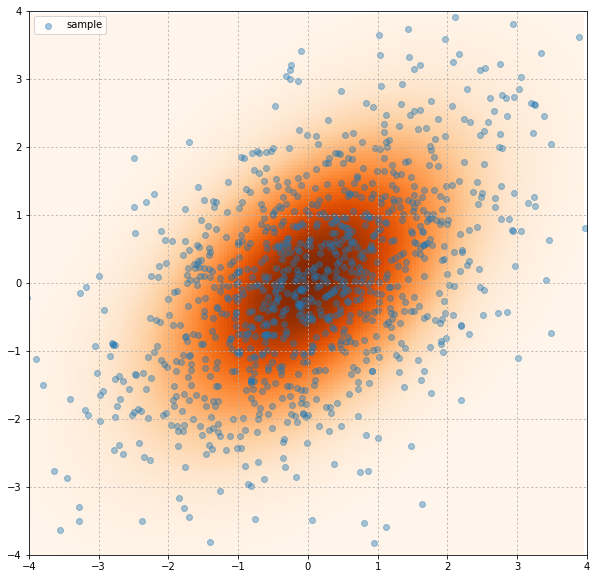

In [10]:
size = 1000
sample = gauss([0,0],[[2,1],[1,2]],size,30)  # Генерация выборки
grid = np.mgrid[-4:4:0.05, -4:4:0.05]
density = np.array([[sps.multivariate_normal.pdf((grid[0, i, j], grid[1, i, j]), mean = [0,0],
                                    cov = [[2,1],[1,2]])
                                    for i in range(grid[0].shape[0])]
                                    for j in range(grid[0].shape[1])])  # Вычисление плотности

plt.figure(figsize=(10, 10))
plt.pcolormesh(grid[0], grid[1], density, cmap='Oranges')
plt.scatter(sample[:, 0], sample[:, 1], alpha=0.4, label='sample')
plt.legend()
plt.grid(ls=':')
plt.xlim((-4, 4))
plt.ylim((-4, 4))
plt.show()

**Вывод:** Из набора стандартных нормальных величин можно получить гауссовский вектор с заданными вектором матожиданий и матрицей ковариаций.

**Задача 2.** Вы уже научились генерировать выборку из равномерного распределения. Напишите функцию генерации выборки из экспоненциального распределения, используя результат задачи 6.9 из книги по теории вероятностей.

Для получения полного балла реализация должна быть без циклов, а параметр `size` может быть типа `tuple`.

In [11]:
def expon(size=1, lambd=1, precision=30):
    return -1/lambd * np.log(1 - uniform(size, precision))

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

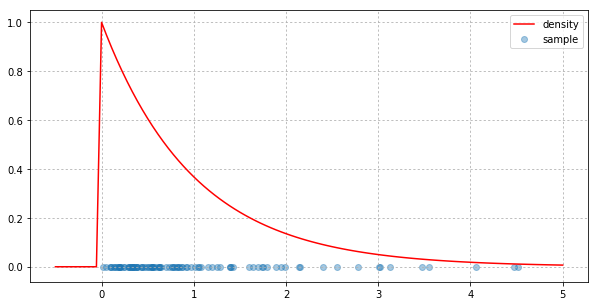

In [12]:
size = 100
grid = np.linspace(-0.5, 5, 100)

plt.figure(figsize=(10, 5))
plt.scatter(expon(size, 1, 50),
           np.zeros(size), alpha=0.4, label='sample')
plt.plot(grid,
         sps.expon.pdf(grid),
         color='red', label='density')
plt.legend()
plt.grid(ls=':')
plt.show()

**Вывод:** Равномерное распределение можно привести к экспоненциальному методом обратных преобразований. 

**Задача 3.** Для каждого распределения постройте эмпирическую функцию распределения (ЭФР), гистограмму и ядерную оценку плотности. Сделать это помогут следующие функции.

In [13]:
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.nonparametric.kde import KDEUnivariate

*1. Бернуллиевское.*

Тут приведен пример построения ЭФР, просто запустите эту ячейку.

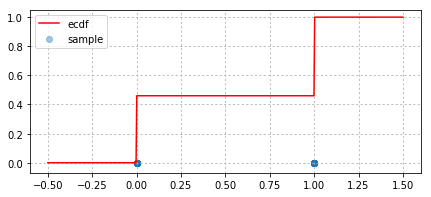

In [14]:
size = 100
sample = coin(size)
ecdf = ECDF(sample)
grid = np.linspace(-0.5, 1.5, 500)

plt.figure(figsize=(7, 3))
plt.scatter(sample, np.zeros(size), alpha=0.4, label='sample')
plt.plot(grid, ecdf(grid), color='red', label='ecdf')
plt.legend()
plt.grid(ls=':')
plt.show()

Далее, чтобы не копировать несколько раз один и тот же код, напишем некоторую функцию.

В третьей функции нужно построить ядерную оценку плотности, о которой будет рассказано на лекциях. В частности, формула была на презентации на первой лекции. Пример построения можно посмотреть тут http://statsmodels.sourceforge.net/0.6.0/generated/statsmodels.nonparametric.kde.KDEUnivariate.html

In [15]:
def draw_ecdf(sample, grid, cdf=None):
    ''' По сетке grid cтроит графики эмпирической функции распределения 
    и истинной (если она задана) для всей выборки и для 1/10 ее части.
    '''
    
    plt.figure(figsize=(16, 3))
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        
        plt.scatter(sample[0:size], np.zeros(size),
                    alpha=0.4, label='sample')
        
        if cdf is not None:
            plt.plot(grid, 
                     cdf(grid), 
                     color='black', alpha=0.3, lw=2, label='true cdf')
        
        plt.plot(grid, 
                 ECDF(sample[0:size])(grid), 
                 color='red', label='ecdf')
        
        plt.legend()
        plt.grid(ls=':')
        plt.title('sample size = {}'.format(size))
    plt.show()

    
def draw_hist(sample, grid, pdf=None):
    ''' Строит гистограмму и по сетке grid график истинной плотности 
    (если она задана) для всей выборки и для 1/10 ее части.
    '''
    
    plt.figure(figsize=(16, 3))
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        plt.hist(sample[0:size], 
                 np.linspace(grid.min(),grid.max(),20),
                 range=(grid.min(), grid.max()), 
                 normed=True)
        
        if pdf is not None:
            plt.plot(grid, 
                     pdf(grid), 
                     color='red', alpha=0.3, lw=2)
    plt.show()
    

def draw_pdf(sample, grid, pdf=None):
    ''' По сетке grid cтроит графики ядерной оценки плотности 
    и истинной плотности (если она задана) для всей выборки и для 1/10 ее части.
    '''
        
    plt.figure(figsize=(16, 3))
    for i, size in enumerate([len(sample) // 10, len(sample)]):
        plt.subplot(1, 2, i + 1)
        kernel_density = KDEUnivariate(sample[:size])
        kernel_density.fit()
        
        plt.scatter(sample[0:size], np.zeros(size), 
                    alpha=0.4, label='sample')
        
        if pdf is not None:
            plt.plot(grid,
                     pdf(grid),
                     color='red', alpha=0.3, lw=2, label='true pdf')
        
        plt.plot(grid,
                 kernel_density.evaluate(grid),
                 color='red', label='kde')
        
        plt.legend()
        plt.grid(ls=':')
    plt.show()

При использовании KDEUnivariate могут возникать разные проблемы. Можно попробовать их решить следующими способами:

**1.** В режиме суперюзера в файле `/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kdetools.py` замените строку 20 на

`y = X[:int(m/2+1)] + np.r_[0,X[int(m/2+1):],0]*1j`

В файле `/usr/local/lib/python3.5/dist-packages/statsmodels/nonparametric/kde.py` замените строку 327 на

`nobs = len(X) # after trim`

**2.** Попробуйте скачать с гитхаба https://github.com/statsmodels/statsmodels/, установить руками. При этом должен быть установлен cython.

Можно также воспользоваться другой реализацией http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html#sklearn.neighbors.KernelDensity

-------

Теперь примените реализованные выше функции к выборкам размера 500 из распределений $U[0, 1]$, $\mathcal{N}(0, 1)$ и $Exp(1)$. Графики (ф.р., плотностей) стройте на интервалах $(-0.2, 1.2)$, $(-3, 3)$ и $(-0.5, 5)$ соответственно.

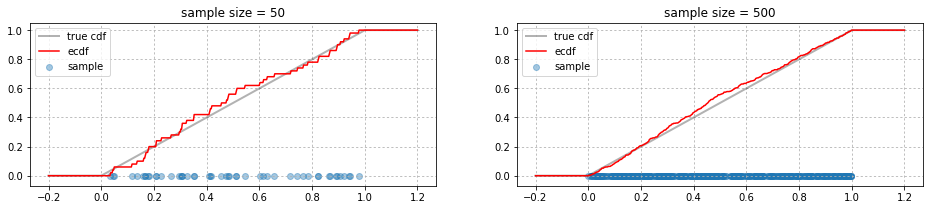

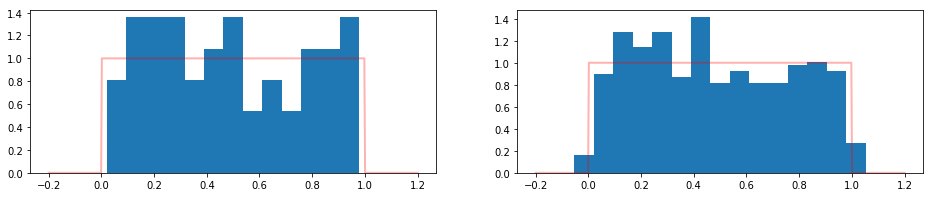

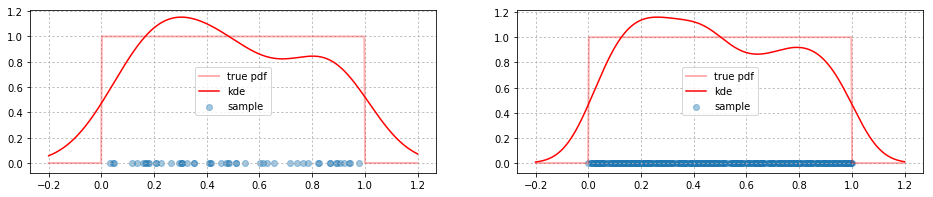

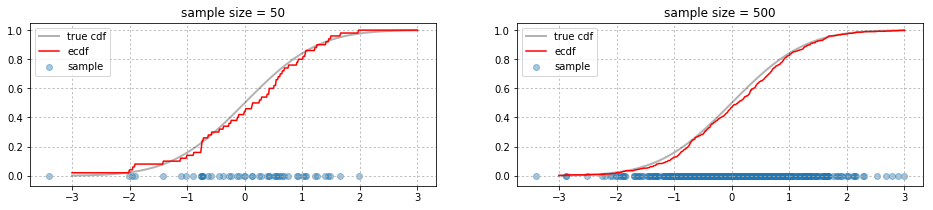

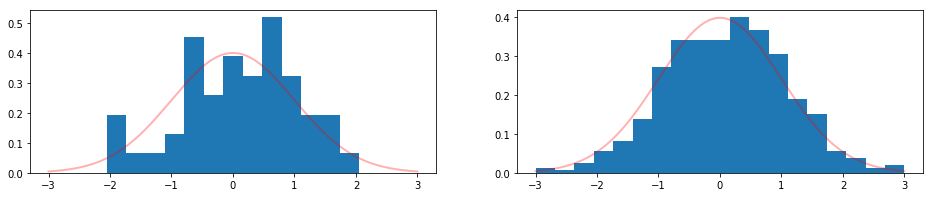

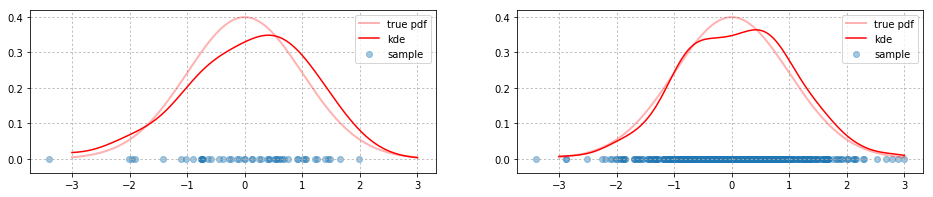

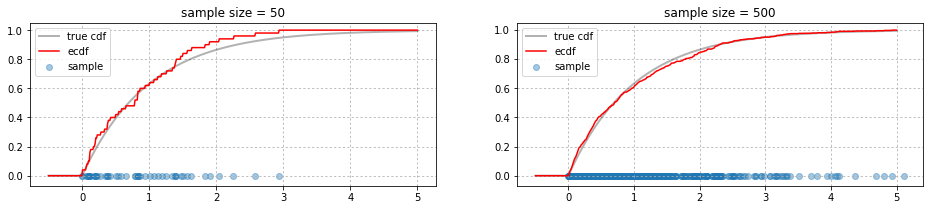

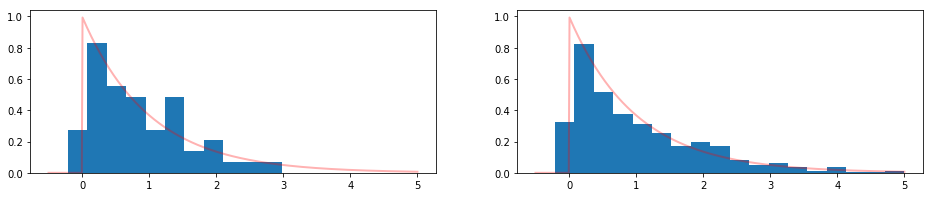

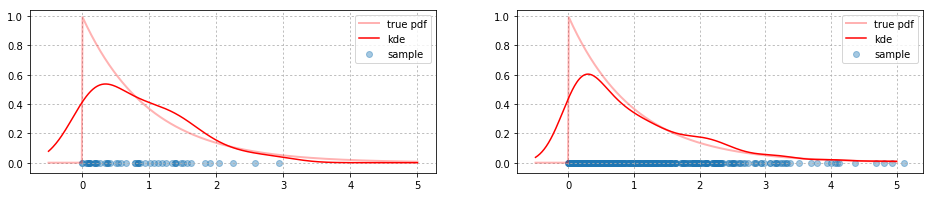

In [16]:
grid = np.linspace(-0.2, 1.2, 500)
a = uniform(500,30)
draw_ecdf(a, grid, sps.uniform.cdf)
draw_hist(a, grid, sps.uniform.pdf)
draw_pdf(a, grid, sps.uniform.pdf)

grid = np.linspace(-3, 3, 500)
a = normal(500, 0, 1, 30)
draw_ecdf(a, grid, sps.norm.cdf)
draw_hist(a, grid, sps.norm.pdf)
draw_pdf(a, grid, sps.norm.pdf)

grid = np.linspace(-0.5, 5, 500)
a = expon(500, 1, 30)
draw_ecdf(a, grid, sps.expon.cdf)
draw_hist(a, grid, sps.expon.pdf)
draw_pdf(a, grid, sps.expon.pdf)

**Вывод:** При увеличении размера выборки график эмпирической функции распределения "приближается" к графику истинной функции распределения,а гистограмма и график ядерной оценки плотности - к графику истинной плотности.

**Задача 4.** Сгенерируйте выборку $X_1, ..., X_{10000}$ из стандартного нормального распределения. Для каждого $n \leqslant 10000$ постройте эмпирическую функцию распределения $F^*_n$ и посчитайте **точное** значение статистики $$D_n = \sup\limits_{x \in \mathbb{R}} \left| F_n^*(x) - F(x) \right|.$$
Постройте график зависимости статистики $D_n$ от $n$. Верно ли, что $D_n \to 0$ и в каком смысле? Не забудьте сделать вывод.

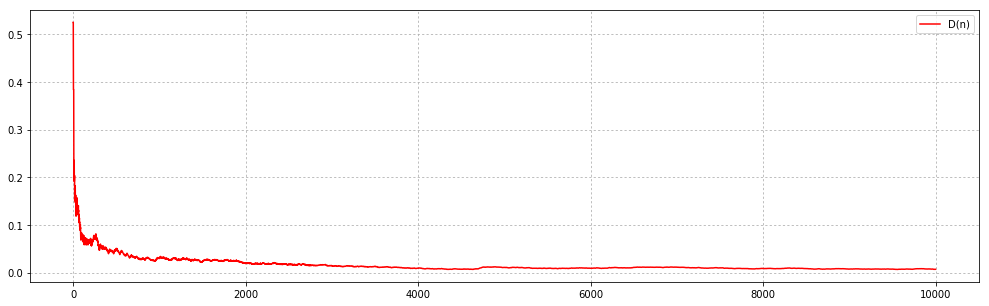

In [17]:
size = 10000
vars = normal(size)
N = sps.norm.cdf
D = np.zeros(size)
cur_arr = vars[0:1]
D[0] = max(1 - N(cur_arr[0]),N(cur_arr[0]))
for i in range(2,size + 1,1):
    cur_arr = np.append(cur_arr,vars[i-1])
    cur_arr.sort()
    F = ECDF(cur_arr[0:i])
    D[i - 1] = max(max(abs(F(cur_arr[0:i])-N(cur_arr[0:i])).max(), 
                   abs(F(cur_arr[0:(i-1)])-N(cur_arr[1:i])).max()),
                   N(cur_arr[0]))
plt.figure(figsize=(17, 5))
plt.plot(np.arange(1,size + 1), D, color='red', label='D(n)')
plt.legend()
plt.grid(ls=':')
plt.show()

**Вывод:**
график показывает, что $D_n \rightarrow 0$.
Из теории мы знаем, что это сходимость почти наверное.

**Задача 5.** Исследуйте вид ядерной оценки плотности в зависимости от вида ядра и его ширины.

Для этого сгенерируйте выборку $X_1, ..., X_{200}$ из распределения $U[0, 1]$ и постройте серию графиков для различной ширины гауссовского ядра, а затем другую серию графиков для различных типов ядер при фиксированной ширине. На каждом графике на отрезке $[-0.2, 1.2]$ должны быть изображены истинная плотность (полупрозрачным цветом) и ее ядерная оценка, а так же с нулевой $y$-координатой должны быть нанесены точки выборки. Для экономии места стройте графики в два столбца.

 Не забудьте сделать вывод.

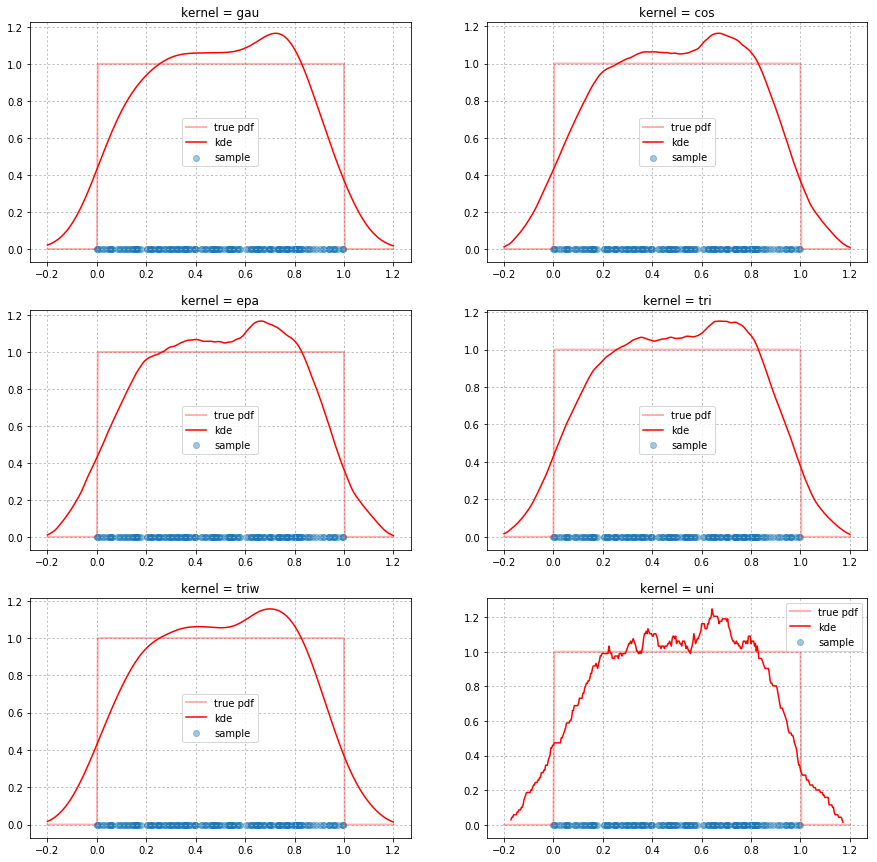

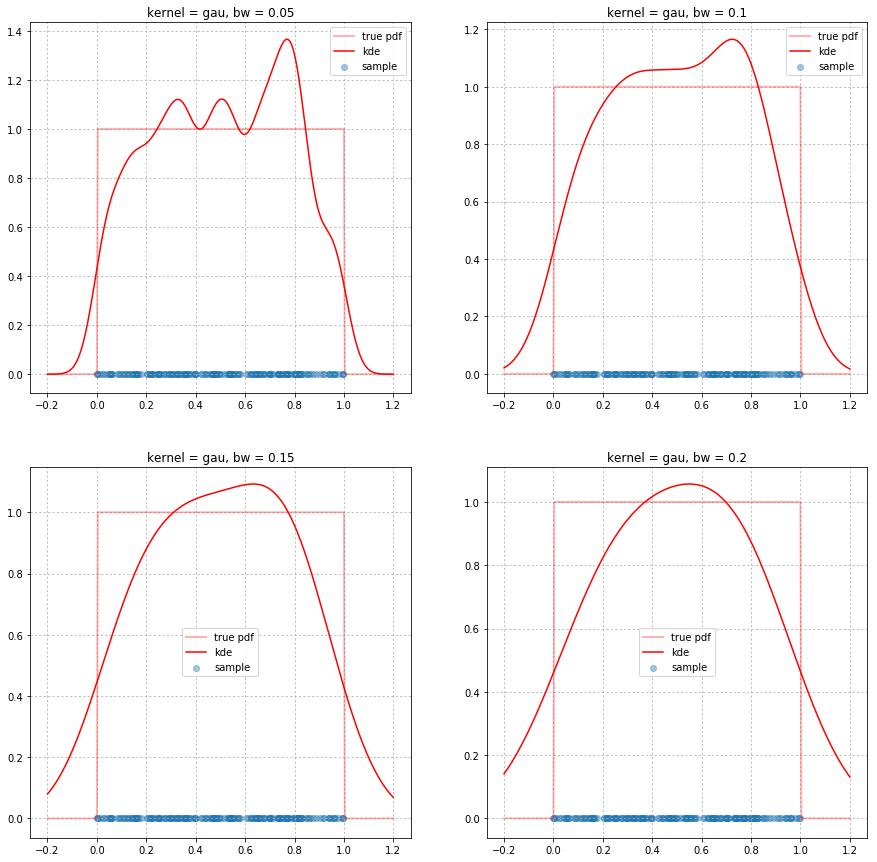

In [18]:
vars = uniform(200)
grid = np.linspace(-0.2,1.2,400)
plt.figure(figsize=(15,15))
for i,ker in enumerate(['gau','cos','epa','tri','triw','uni']):
        plt.subplot(3, 2, i+1)
        
        kernel_density = KDEUnivariate(vars)
        kernel_density.fit(kernel = ker, fft = False)
        
        plt.scatter(vars, np.zeros(200), 
                    alpha=0.4, label='sample')
        
        plt.plot(grid, sps.uniform.pdf(grid),
                     color='red', alpha=0.3, lw=2, label='true pdf')
        
        plt.plot(grid, np.array(list(map(kernel_density.evaluate,grid))),
                 color='red', label='kde')
        
        plt.legend()
        plt.title("kernel = " + ker)
        plt.grid(ls=':')
plt.show()
print("\n\n")
plt.figure(figsize=(15,15))
for i,b_w in enumerate([0.05, 0.1, 0.15, 0.2]):
        plt.subplot(2, 2, i+1)
        
        kernel_density = KDEUnivariate(vars)
        kernel_density.fit(kernel = 'gau', bw = b_w, fft = False)
        
        plt.scatter(vars, np.zeros(200), 
                    alpha=0.4, label='sample')
        
        plt.plot(grid, sps.uniform.pdf(grid),
                     color='red', alpha=0.3, lw=2, label='true pdf')
        
        plt.plot(grid, np.array(list(map(kernel_density.evaluate,grid))),
                 color='red', label='kde')
        
        plt.legend()
        plt.title("kernel = gau, bw = " + str(b_w))
        plt.grid(ls=':')
plt.show()

**Вывод:** При использовании разных ядер оценки протности имеют одинаковый внешний вид. При увеличении ширины ядра у графика уменьшается количество интервалов, на которых функция монотонна.

**Задача 6.** В файле `countries.csv` дан список стран и территорий с указанием их площади. Нанести значения площади на график и постройте эмпирическую функцию распределения и ядерную оценку плотности. Поскольку некоторые страны слишком большие, ограничьте график по оси икс.  Не забудьте сделать вывод.

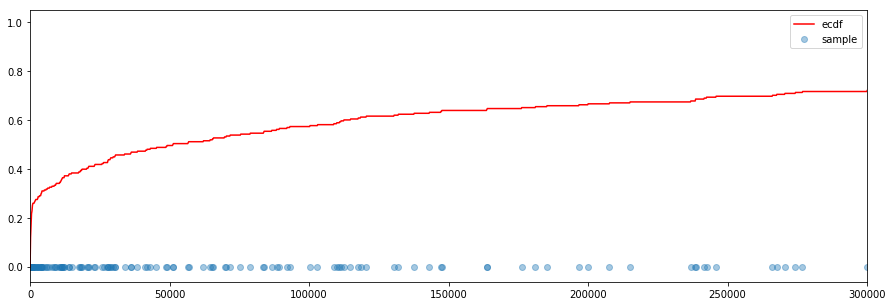

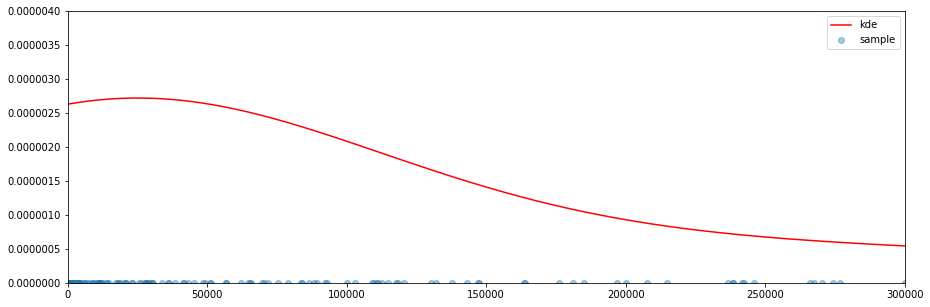

In [19]:
f = open('countries.csv')
sq = [] 
for lines in f:
    sq.append(float(lines.split('\t')[2][:-1]))
f.close()

sq = np.array(sq)
maxx = 200000
plt.figure(figsize = (15,5))
grid = np.linspace(0,int(sq[0]),100000)

F = ECDF(sq)
plt.scatter(sq, np.zeros(sq.size), alpha=0.4, label='sample')
plt.plot(grid, F(grid), color = "red", label="ecdf")
plt.legend()
plt.xlim([0,300000])
plt.show()

plt.figure(figsize = (15,5))
kernel_density = KDEUnivariate(sq)
kernel_density.fit(kernel = 'gau')
plt.scatter(sq, np.zeros(sq.size), alpha=0.4, label='sample')
plt.plot(grid, kernel_density.evaluate(grid), color = "red", label = "kde")
plt.legend()
plt.xlim([0,300000])
plt.ylim([0,4 * 1e-6])
plt.show()

**Вывод:** По графику ядерной оценки плотности можно предположить, что это логнормальное распределение.(или Гамма)

**Задача 7.** Проведите небольшое исследование. Выберите случайных $n$ человек в социальной сети. Вы можете выбирать их случайно из всех зарегистрированных в этой социальной сети, либо по какому-то *одному* критерию (укажите его). Составьте выборку $X_1, ..., X_n$, где $X_i$ --- количество друзей у $i$-го человека. Постройте по этой выборке эмпирическую функцию распределения. Можете ли вы сказать, какому закону подчиняется распределение количества друзей?

Выборка должна быть из не менее 30 человек, ограничений сверху нет. Вы можете также написать программу, которая будет автоматически собирать данные.  Не забудьте сделать вывод.

Размер выбори: 92


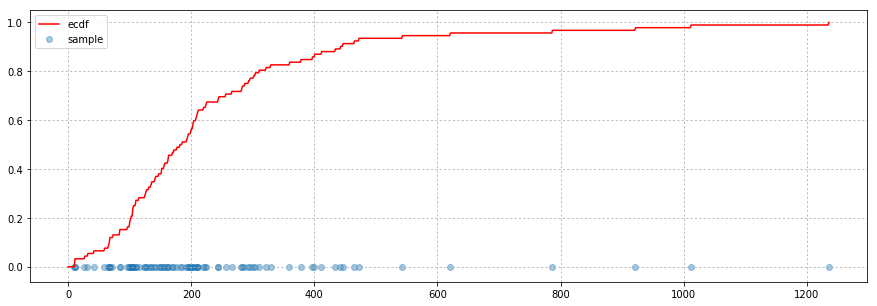

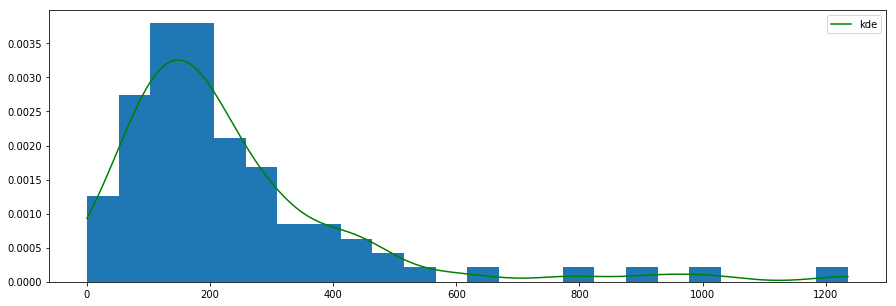

In [20]:
X = np.array([155,99,110,224,223,84,219,310,163,434,396,66,202,156,359,134,464,101,104,209,256,211,67,200,161,151,304,
              210,163,176,286,181,105,125,195,140,301,142,542,321,244,207,194,378,446,169,204,442,106,65,281,42,59,127,
              72,84,100,31,283,921,171,1011,620,266,102,110,147,124,329,198,202,11,130,151,1236,96,185,105,411,786,292,
              115,295,472,243,400,68,11,26,192,135,10])
print("Размер выбори: " + str(X.size))
grid = np.linspace(0,X.max(),1000)
plt.figure(figsize = (15,5))
plt.scatter(X, np.zeros(X.size), alpha=0.4, label='sample')
plt.plot(grid, ECDF(X)(grid), color='red', label='ecdf')
plt.legend()
plt.grid(ls=':')
plt.show()

plt.figure(figsize = (15,5))
plt.hist(X, np.linspace(grid.min(),grid.max(),25), range=(grid.min(), grid.max()), normed = True)
kernel_density = KDEUnivariate(X)
kernel_density.fit(kernel = 'gau', fft = False)

plt.plot(grid, kernel_density.evaluate(grid),
                 color='green', label='kde')
plt.legend()
plt.show()

**Вывод:** По графику ядерной оценки плотности можно предположить, что это логнормальное распределение.(или Гамма)